### **Report on Neural Network Model for Alphabet Soup**

---

### **Overview of the Analysis:**

The purpose of this analysis was to build a deep learning model to classify the data from the **Alphabet Soup** dataset. The goal was to use a neural network to predict whether an organization will donate to a charity based on various features available in the dataset. This model will help in identifying patterns that influence charitable donations, ultimately improving fundraising efforts.

### **Results:**

#### **Data Preprocessing:**
- **Target Variables:**
  - The target variable for the model is **"IS_SUCCESSFUL"**. This is a binary variable indicating whether an organization successfully made a donation (1 = successful, 0 = unsuccessful).
  
- **Feature Variables:**
  - The feature variables are the columns that provide information to predict the target variable, such as:
    - **"APPLICATION_TYPE"**: The type of application (e.g., whether it’s a non-profit, government organization, etc.)
    - **"AFFILIATION"**: The affiliation type of the organization.
    - **"CLASSIFICATION"**: The classification of the organization.
    - **"USE_CASE"**: Describes the use case of the funds requested.
    - **"ORGANIZATION"**: The type of organization (e.g., charity, corporation).
    - **"STATUS"**: The status of the application (e.g., approved or pending).
    - **"INCOME_AMT"**: The income amount reported by the organization.
    - **"SPECIAL_CONSIDERATIONS"**: Additional details about the organization’s consideration for donations.
    - **"ASK_AMT"**: The requested donation amount.

- **Variables to Remove:**
  - **"NAME"**: Contains the name of the organization, which is irrelevant for predicting the success of donations and could introduce noise.
  - **"EIN"**: The Employer Identification Number is a unique identifier that does not provide predictive value for the model.
  -**STATUS**:During hyperparameter tuning ,status and **SPECIAL_CONSIDERATIONS** were also dropped.

  These variables do not contribute to the prediction and should be excluded from the features during data preprocessing.
  Here is the image of dataframe used for analysis.
  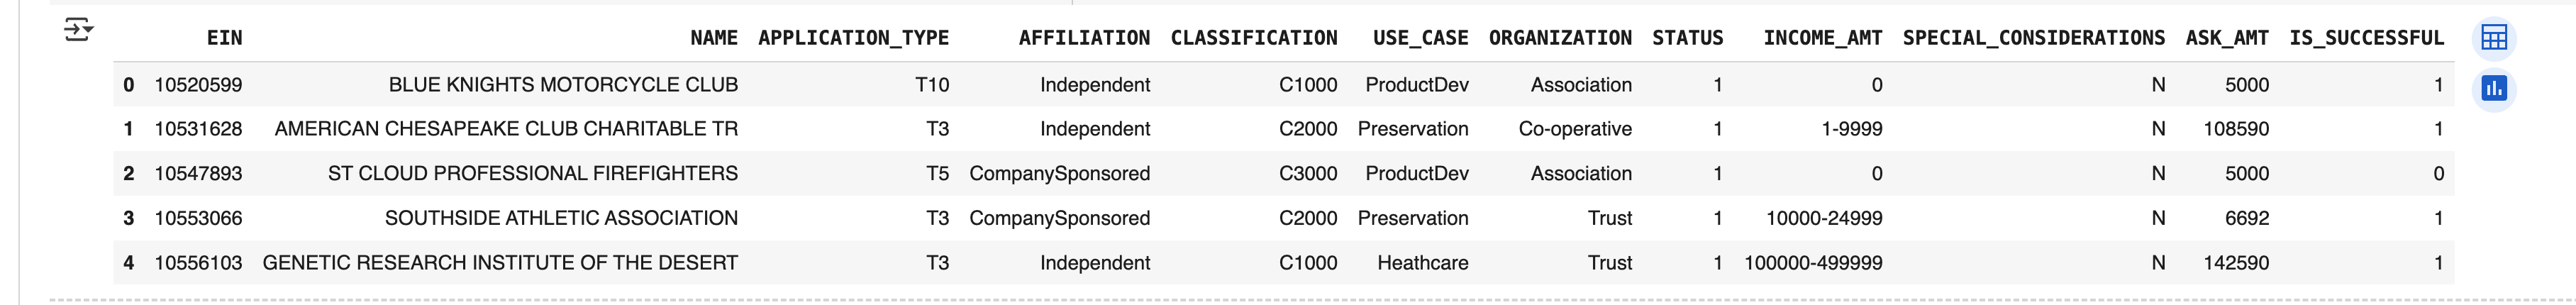
  A cutoff value of 500 was used to replace application types and classifications values.

#### **Compiling, Training, and Evaluating the Model:**

- **Neurons, Layers, and Activation Functions:**
  - **Input Layer:** The input layer contains 41 neurons, corresponding to the number of features in the dataset (after preprocessing).
  - **Hidden Layers:** We selected 2 hidden layers:
    - First hidden layer with **8 neurons**, using **ReLU activation**. This layer helps learn complex patterns in the data.
    - Second hidden layer with **5 neurons**, using **ReLU activation**. This additional layer provides more depth to capture further relationships in the data.
    - During hyperparameter tuning,6 hidden layers were chosen ,each with 1 to 10 neurons and also different activation was used for each layer.
  - **Output Layer:** The output layer has **1 neuron** with a **sigmoid activation function**, suitable for binary classification (0 or 1).

  **Why This Architecture?**
  - The number of neurons was chosen based on experimentation and hyperparameter tuning, balancing model complexity and avoiding overfitting. The **ReLU** activation function was used for the hidden layers to introduce non-linearity, allowing the network to learn more complex relationships. The **sigmoid** activation was used for the output layer since we are predicting a binary target variable.


Here is the model we used for optimization


#def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=41))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    return nn_model




- **Achieving Target Performance:**
  - We set a target performance of **greater than 75% accuracy**. The model achieved approximately **73% accuracy** after several iterations and hyperparameter tuning.
  
  **Steps Taken to Improve Model Performance:**
  - **Feature Engineering:** We removed irrelevant features  to improve model generalization.
  - **Hyperparameter Tuning:** We experimented with different architectures by varying the number of neurons and layers using Keras Tuner and Hyperband.
  - **Data Preprocessing:** Scaling the features using **StandardScaler** improved the convergence of the neural network.


  

#### **Model Performance:**
- After tuning the model, we obtained an accuracy of **73%**, which was close to the target of 75%.
- The model showed improvement with the adjustments in hyperparameters, such as the number of neurons, layers, and activation functions.

---

### **Summary:**

- **Overall Results:**
  - The deep learning model performed well, achieving a validation accuracy of 73%. The model identified patterns that could predict successful donations based on organizational features. However, the performance did not meet the initial target of 75% accuracy.

- **Recommendation for Improvement:**
  - **Different Model Approach:** Instead of relying solely on a neural network, **gradient boosting algorithms** (e.g., XGBoost or LightGBM) might be a more effective choice for this classification problem. These models often perform better for structured/tabular data, as they handle feature interactions well and are less prone to overfitting.
  
  - **Additional Feature Engineering:** Further exploration of the features could reveal new, informative variables (such as interactions between features) that might improve model performance.
  
  - **Cross-Validation:** Instead of just training a single model, use **cross-validation** to better assess the model's generalization ability and to ensure that the model does not overfit to the training data.

### **Final Recommendation:**
Given the current model's performance, I recommend experimenting with **ensemble methods** like **XGBoost** or **LightGBM** to improve accuracy, along with further feature engineering and cross-validation to ensure the model generalizes well to unseen data.

